### Tabla del "nor"

| $$x_1$$ | $x_2$ | $$\sum_i x_i = -x_1 - x_2 $$ | $$ \ge \text{threshold}$$ | $$x_1 \text{ nor } x_2$$ |
|---|---|:-------:|------|:-------:|
| 1 | 1 | -2 | 0 | 0 
| 1 | 0 | -1 | 0 | 0
| 0 | 1 | -1 | 0 | 0 
| 0 | 0 | 0 | 0 | 1

### Tabla del "xor"

| $$x_1$$ | $x_2$ | $$\sum_i x_i = x_1 + x_2 $$ | $$ \ge \text{threshold}$$ | $$x_1 \text{ nor } x_2$$ |
|---|---|:-------:|------|:-------:|
| 1 | 1 | 2 | ? | 0 
| 1 | 0 | 1 | ? | 1
| 0 | 1 | 1 | ? | 1 
| 0 | 0 | 0 | ? | 0

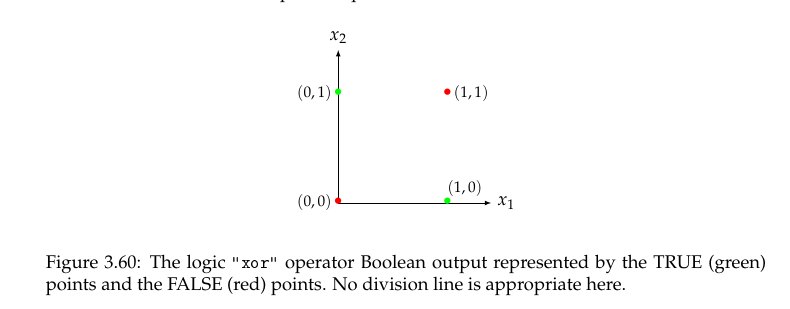

Antes de estudiar el XOR de manera exhaustiva veamos que son las

### Funciones de Activacion (Activation functions)


* La identidad. Es la mas simple y no hace nada, simplemente crea una regresion. Veremos que la propagacion hacia adelante (modelamiento) de una red nueronal es un prodcuto de matrices y si la funcion de activacion es la identidad entonces $A_1 I A_2 I A_3 I \theta = y$, 
$ A_1 A_2 A_3 \theta = y$. Donde $A=A_1 A_2 \cdots A_3$. Es decir, las redes neuronales son una regresion cuando la funcion de activacion es la identidad.

* Realmente el objeto de las funciones de activacion es "quebrar" la linealidad. Y aca esta la magia de las redes neuronales, que simulan problemas no lineales. Recuerde el problema del apriximador universal. Cualquier funcion (casi todas) se puede representar con una red neuronal. Si la activacion fuese la identidad, **solo** las funciones lineales se pueden representar con una red neuronal. Tenemos entonces otra activacion. Esta se llama la **Heaaviside**:

\begin{eqnarray}
H(t) =  \left \{
    \begin{array}{cc}
    1 & \text{si } t > 0 \\
    0 & \text{si } t \le 0 
    \end{array}
    \right .
\end{eqnarray}




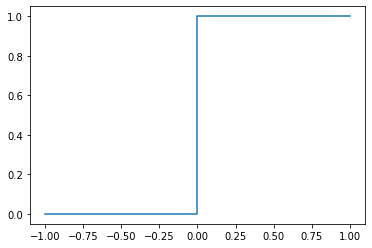

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x=[-1,0,1]
y=[0,0,1]

plt.step(x,y)

* **logistica**: Esta es la funcion $S(t)=1/(1 + \exp(-t))$.



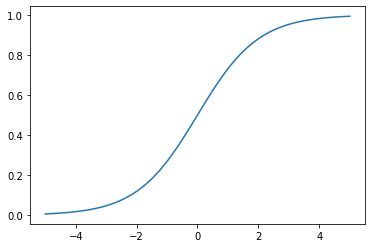

In [2]:
def S(t):
    return 1/(1 + np.exp(-t))

x = np.arange(-5,5.1 ,0.1)

plt.plot(x, S(x))

El problema de la sigmoid (logistic) es que la derivada se acerca a 0 para numeros lejos de cero. Recuerde que $S(t) \approx 1 $, $t \gg 1$. Recuerde tambien que $S'(t)=S(t) (1 - S(t))$. Para numeros muy pequenos $t \gg -1$, $S(t) \approx 0$, entonces la derivada $S'(t)$ es casi cero en numeros lejanos al cero. Esto es un problema.

$$ \theta_i = \theta_{i-1} - \alpha \nabla_{\theta} J(\theta_i) $$
si $\nabla_{\theta} J(\theta_i) \approx 0$, entonces 
$\theta_i \approx \theta_{i-1}$ entonces el sistema no aprende. La convergencia se detiene. A este problema se le conoce como el problema de **vanishing gradient** . Entonces la funcion logistica perdio popularidad y la gano la tanh.

* tanh. 

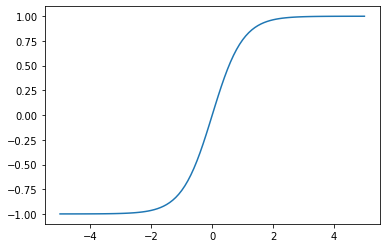

In [3]:
plt.plot(x, np.tanh(x))

Note que la tanh tambien se comporta en los puntos distances como la logistica. La tanh tiene un rando $(-1, 1)$ y  el 0 es punto fijo, $\tanh (0) = 0$. 

$$ \tanh(t) = \frac{\sinh(t)}{\cosh(t)} = \frac{\mathrm{e}^{t} - \mathrm{e}^{-t}}{\mathrm{e}^{t} + \mathrm{e}^{-t}}$$
Esta fue popular a finales de los 90. Tambien sufre el vanishing gradient. 

* Como el vanishing gradient seguia siendo un problema, entonces se creo al ReLU (Rectified linear unit). 

$$\text{ReLU} = \left \{  \begin{array}{cc} 0 & \text{ si  }  x \le0 \\ x & \text{ si } x > 0  \end{array} \right .$$



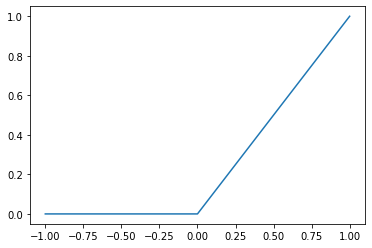

In [5]:
def ReLU(x):
    if x< 0 :
        return 0
    else :
        return x

l=-1.0
r=1.1

x = np.arange(l,r, 0.1)

R = [ReLU(x) for x in np.arange(l,r,0.1)]
R2 = np.array(R)

plt.plot(x,R2)

Esta funcion no es como las otras. No representa una probabilidad,
no es monotonicamente creciente. No es es diferenciable en 0.
Pero la derivada (en los positivos) es 1. O sea que no sufre el 
vanishing gradient. En los negativos es 0. Pordria ocurrir que
para $x<0$ el gradiente es 0 y que pare de aprender. A esto se lo conoce como la ["dying ReLU  neuron"](https://towardsdatascience.com/the-dying-relu-problem-clearly-explained-42d0c54e0d24). Sin embargo, esta funcion de activacion es muy popular en las redes neuronales. 

La funcion de activacion
[ReLU](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6) es la mas usada en redes neuronales hoy en dia.

* aparece la **leaky ReLU** la cual no tiene el problema del vanishing gradient pero es un poco similar.

\begin{eqnarray} \text{Leaky ReLU($t$)} = \left \{
    \begin{array}{cc}
    at & \text{ si } t < 0 \\
    t & \text{ si } t \ge 0 
    \end{array}
    \right .   
\end{eqnarray}
donde $a$ es pequenho. En el ejemplo que ponemos enseguida $a=0.01$. 
La documentacion de [keras](https://keras.io/api/layers/activation_layers/leaky_relu/) en el link.




In [6]:
def leakyReLU(t, a):
    if t<0:
        return a*t

    else:
        return t


In [7]:
leakyReLU(-0.5, 0.3)

-0.15

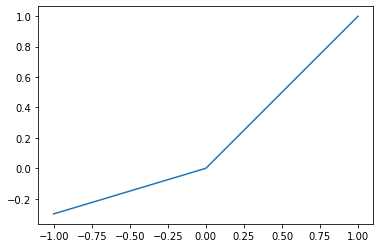

In [8]:
import numpy as np
x = np.arange(l,r, 0.1)
a=0.3

R = [leakyReLU(x,a) for x in np.arange(l,r,0.1)]
R2 = np.array(R)

plt.plot(x,R2)

* La ultima de esta coleccion es la **exponential  linear Unit (ELU). La idea es suavizar la esquina en $0$.

\begin{eqnarray}
\text{ELU}(t)  = \left \{
    \begin{array}{cc}
    \alpha ( \mathrm{e}^t - 1) & \text{ si } t < 0 \\
    t & \text{ si } t \ge 0 
    \end{array}
    \right . 
\end{eqnarray}

$Si $\alpha=1$ tanto la funcion como su derivada son continuas,
que mas "redondita" la esquina.


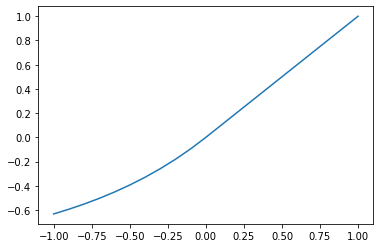

In [8]:
def ELU(t, a):
    if t < 0 :
        return a*(np.exp(t)-1)
    else:
        return t

x = np.arange(-1,1.1, 0.1)
a=1

R = [ELU(x,a) for x in np.arange(-1,1.1,0.1)]
R2 = np.array(R)

plt.plot(x,R2)


El sisguiente [link](https://keras.io/api/layers/activations/#layer-activation-functions) muestra las funciones de activacion en el paquete `keras` .

* La ultima es la softmax. 

\begin{eqnarray}
\sigma : \mathbb{R}^K &\to& [0,1]^k \\
(z_i) &\mapsto& \sigma(z_i) = \frac{\exp(z_i)}{\sum_{j=1}^K \exp(z_j)}
\end{eqnarray}
$i=1,2, \cdots, K$, $z_i \in \mathbb{R}$

## Propagacion hacia adelante en una red neuronal. (forward propagation).

8:55, seguimos.

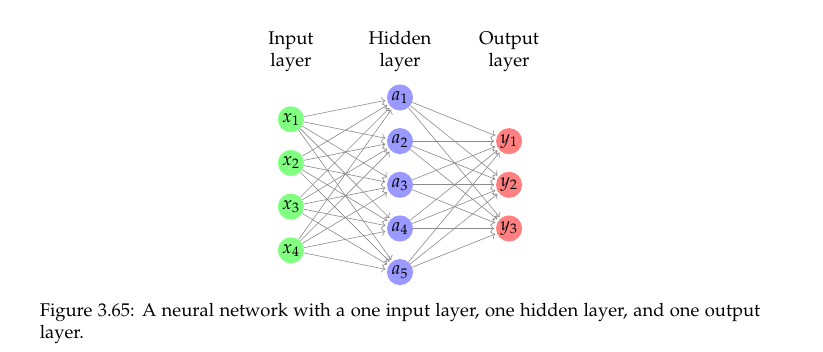

Por la complejidad del problema, comenzamos con ejemplos sencillos.

* Una neurona de entrada, una oculta y una de salida.

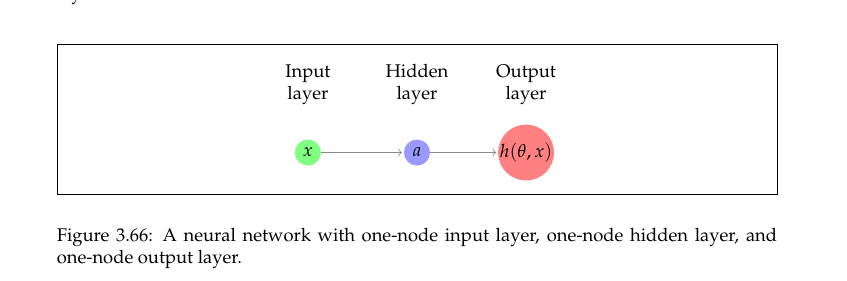

Exlipquemos este modelo de propagacion.

* $x$ son los datos de entrada.
* Entre $x$ y $a$ estan los pesos $\theta$, y llamamos
$z^{(2)}=x \theta^{(1)}$, un valor intermedio que es la parte lineal del problema.
* llamamos $a$ a la activacion. Por ejemplo, si $a=S(t)$, entonces

$$ a^{(2)} = S(z) = \frac{1}{1 + \exp (-z^{(2)}) } $$

* para movernos a la salida $h(\theta, x)$ pesamos $a^{(2)}$ con el segundo $z^{(3)} = \theta^{(2)} a $, 

* finalmente

$$ h(\theta, x) = S(z^{(2)}) = \frac{1}{1 + \exp(-z^{(3)})}$$
Dependiendo el umbral escogemos los 2 posibles valores para $h$ como Falso, o Verdero.



In [9]:
x= 3
theta1 = 0.2
z2 = x*theta1

def S(t):
    return 1/(1 + np.exp(-t))
a2 = S(z2)

theta2 = 0.4
z3 = a2*theta2
hthetax = S(z3)
# decida por el threshold
hthetax



0.564209133482229

Recuerde $\theta_i = \theta_{i-1} - \alpha \nabla_{\theta} J(\theta_{i-1})$
En el resultado anterior si $threshold = 0.5$ entonces se aproxima a 1 o a verdadero.

* El siguiente nivel de complejidad es varios nodos de entrada, un nodo oculto y uno de salida.

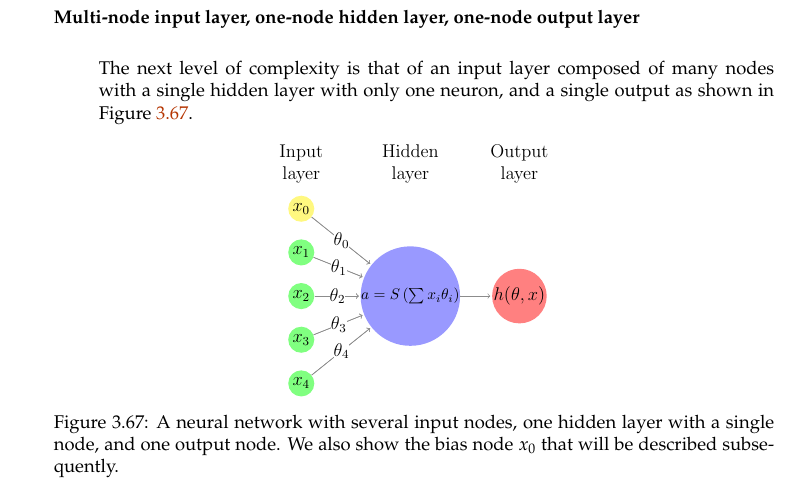

Los pasos son los siguientes.

* Se pesan los datos de entrada con los $\theta$ se les llama $z^{(2)}$.

$$ z^{(2)}(\theta, x) = x_0 \theta_0 + x_1 \theta_1 + x_2 \theta_2 + x_3 \theta_3 + x_4 \theta_4  $$

* Se usa la activacion (logistica) para obtener $a^{(2)}$. 

$$ a^{(2)} = \frac{1}{1 + \mathrm{e}^{-z^{(2)}}} $$

* Se usa esta activacion y el $\theta^{(2)}$ para obtener $z^{(3)}$.

$$z^{(3} = a^{(2)} \theta^{(2)} $$

* finalmente la acticion $a^{(3)}=h(\theta, x)$ es decir

$$a^{(3)} = h(\theta, x) = \frac{1}{1 + \mathrm{e}^{-z^{(3)}}} $$.

Con este $h$ y el umbral decididmos.

Esto lo podemos vectorizar.

$$ z^{(2)} (\theta, x) = \sum_{j=0}^n x_j \theta_j = x^T \Theta $$



* El siguiente nivel es: varios nodos de entrada, varios nodos ocultos y un nodo de salida.

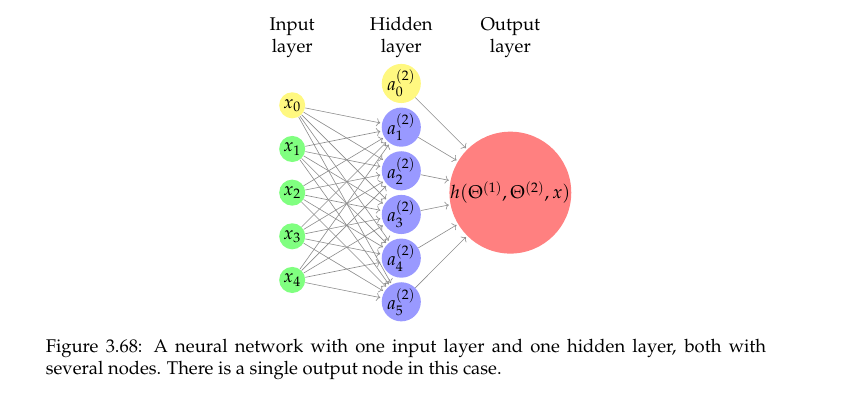

* Primer paso obenter los $z^{(2)}$ como promedios ponderados de los pesos $\theta^{(1)}$. Los thetas son una matriz $\Theta$. 

Mas exactamente

$$ z_1^{(2)} (\theta, x) = \sum_{j=0}^n x_j \theta_{j1}^{(1)}  $$

$$ z_2^{(2)} (\theta, x) = \sum_{j=0}^n x_j \theta_{j2}^{(1)}  $$
y en general, hasta capa 5.

$$ z_5^{(2)} (\theta, x) = \sum_{j=0}^n x_j \theta_{j5}^{(1)}  $$

en general

$$ z_i^{(2)} (\theta, x) = \sum_{j=0}^n x_j \theta_{ji}^{(1)}  \quad , \quad i=1,2, \cdots, p  $$ donde $p$ es el numero de nodos (neuronas) de la capa oculta.


* Esto lo podemos ver vectorizadod como un producto de matrices.s 

$$ z^{(2)} = x^T \Theta^{(1)} $$
Asi como esta es un vector fila $1 \times m$ por $m \times n$, essto da
$1 \times n$.

Si lo quiere como vector columna, haga la transpuesta

$$ z^{(2)} = (\Theta^{(1)})^T x. $$

* El paso siguiente, es que datos los $z_i^{(2)}$ construya los correspondientes $a_i^{(2)}$ usando la funcion de activacion.


$$a_i^{(2)} = S(z_i^{(2)}) = \frac{1}{1 + \mathrm{e}^{z_i^{(2)}}} $$,
$i=1,2, \cdots, p$. 

* El paso siguiente es $z^{(3)}$, Esta es una combinacion lineal de los pesos $\theta^{(2)}$ con las activacicones $a^{(3)}$. 


$$ z^{(3)} = \sum_{j=0}^p a_j^{(2)} \theta_j^{(2)}  $$

* finalmente

$$ a^{(3)} = h(\theta, x) =  S(z^{(3)}) = \frac{1}{1 + \mathrm{e}^{-z^{(3)}}}$$ .




* Varias entradas, varios nodos ocultos y varias salidas.

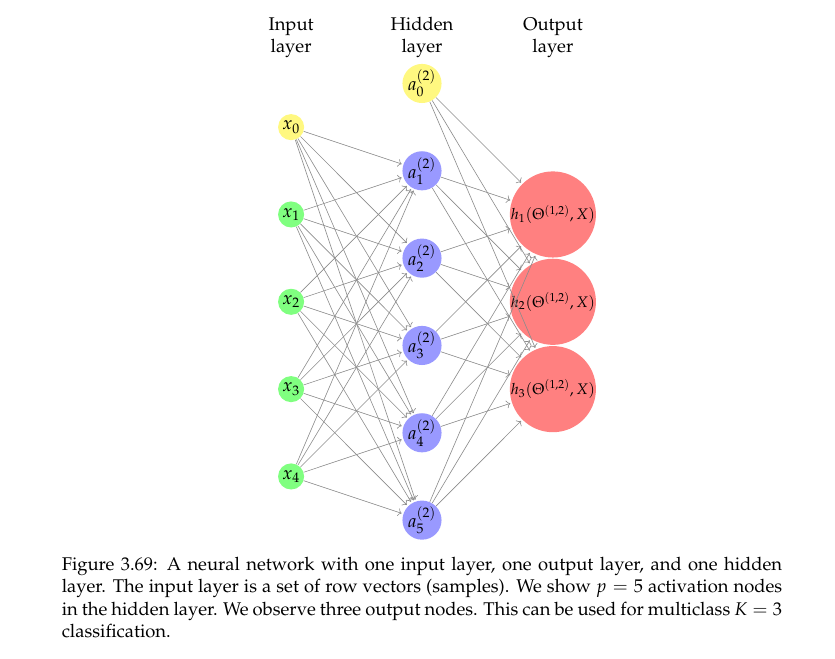

* Primero toca calcular $z_i^{(2)}$. En este momento $\Theta^{(1)}$ es una matriz $n \times p$. Repitiendo (puedo copiar y pegar) lo del ejemplo anterior.

$$ z_i^{(2)} = \sum_{k=0}^n x_k \theta_{ki}^{(1)} $$,
recuerde que la vectorizacion de esto es

$$ z_j^{(2)} = x^T \Theta_j^{(1)}  $$

* Luego aplicamos las activaciones.

$$ a_i^{(2)} = \frac{1}{1 + \mathrm{e}^{(-z_i^{(2)})}}, i=1,2, \cdots, p. \quad , \quad a_0^{(2)}= 1  $$


* vamos para la capa 3 y debemos hallar $z^{(3)}$. 

$$ z_i^{(3)} = \sum_{k=0}^p a_k^{(2)} \theta_{ki}^{(2)} $$

Vectorizamos

$$z_i^{(3)} = a^{(2)} \Theta_i^{(2)}  \quad , \quad i=1,2,3 $$

* Finalmente 


$$ a_i^{(3)} = h_i(\Theta, x) = \frac{1}{1 + \mathrm{e}^{-z_i^{(3)}}} \quad , \quad i=1,2,3  $$



Ahora, que pasa si los $x$ de entrada son vectores. Por ejemplo
en los diagramas de arriba $x_0, x_1, \cdots, x_n$ son escalares.
Piense que son pixeles. Pero que tal queramos interpretar imagenes con colores, por ejempo RGB. Hay 3 canales, y cada pixel es un vector de 3 componentes.

Pienses que los $x_i$ son vectores $i=1,2, \cdots, n$ cada vector puede tener $m$ componentes, de forma que la entrada ahora es una matriz $x$ de orden $n \times m$. Nosotros en este curso queremos matrices $m \times n$,
entonces podemos llamar $X = x^T$ .

* Primero toca calcular $z_i^{(2)}$. En este momento $\Theta^{(1)}$ es una matriz $n \times p$. Repitiendo (puedo copiar y pegar) lo del ejemplo anterior.

$$ z_{ij}^{(2)} = \sum_{k=0}^n x_{ik} \theta_{kj}^{(1)} $$,
recuerde que la vectorizacion de esto es

$$ Z^{(2)} = X \Theta^{(1)}  $$

En componentes:
 $$Z^{(2)}_{m \times p} = X_{m \times n} \Theta^{(1)}_{n \times p} $$

 * Despues de los $z$s vienen los $a$s. 

 $$ a_{ij}^{(2)} = S(z_{ij}^{(2)})  = \frac{1}{1 + \mathrm{e}^{-z_{ij}^{(2)}}} $$

Vectorizando esta expresion

$$ A^{(2)} = \frac{1}{1 + \mathrm{e}^{-Z^{(2)}}} $$

Ejemplo de esto en `Python`

In [10]:
a = np.array([[1,3],[-2,4]])
S(a)

array([[0.73105858, 0.95257413],
       [0.11920292, 0.98201379]])

* Debemos avanzar una capa mas, a la ultima (3).

$$ Z^{(3)} = A^{(2)} \Theta^{(2)} $$

* Finalmente la activacion $A^{(3)}$,

$$ A^{(3)} = S(Z^{(3)}) = H(\Theta^{(2)}, A^{(2)}) $$

en componentes:

$$ h_j^{(i)}(\Theta^{(2)}, A^{(2)}) = \frac{1}{1 + \mathrm{e}^{- \sum_{k=0}^p a_{ik}^{(2)} \theta_{kj}^{(2)}}}$$

En palabras.

La propagacion hacia adelante es un producto de matrices intercaladas con funciones de activacion.

* $Z^{(2)} = X \Theta^{(1)}$
* $A^{(2)} = S(Z^{(2)}) $

* $Z^{(3)} = A^{(2)} \Theta^{(2)}$
* $A^{(3)} = S(Z^{(3)}) $
y asi suscesivamente. 


* $Z^{(n)} = A^{(n-1)} \Theta^{(n)}$
* $A^{(n)} = S(Z^{(n)}) $

### El bias
Son los nodos amarillos. Todos tiene valor 1, sigifican el intercepto.
Veamos una grafica del sigmoid, sin y con bias.
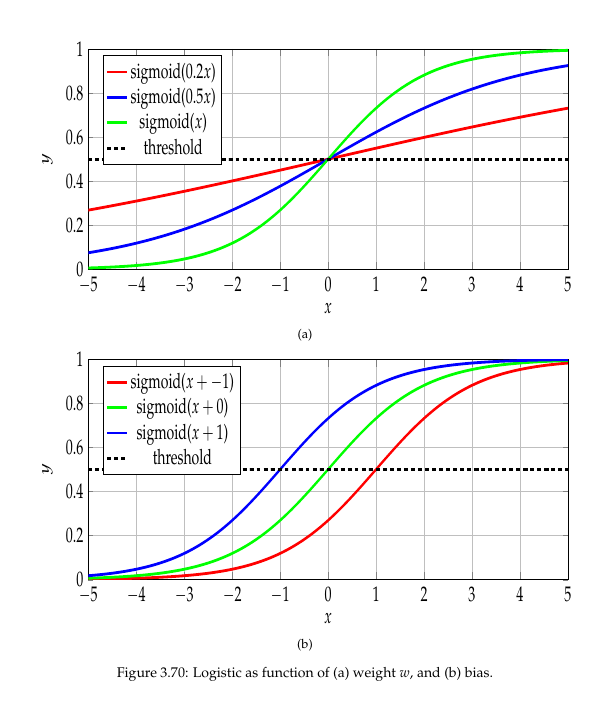

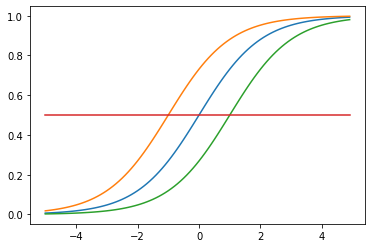

In [11]:
from matplotlib.pyplot import grid
x = np.arange(-5,5,0.1)
myCero = np.zeros(len(x)) + 0.5

# plt.grid(True)


plt.plot(x, S(x))
plt.plot(x, S(x+1))
plt.plot(x, S(x-1))
plt.plot(x, myCero)

# plt.grid()



plt.show()

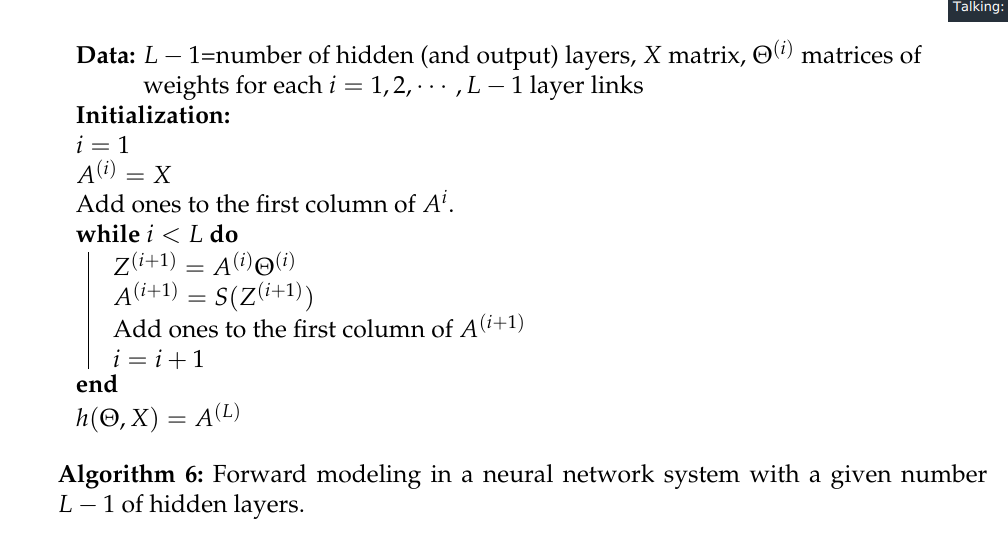

[Ver este video](https://www.youtube.com/watch?v=aircAruvnKk).

Proxima clase:

El sistema XOR (ejemplo de propagacion hacia adelante).
Backpropagation (terminamos las redes neuronales).

